<a href="https://colab.research.google.com/github/r12senthil/HealthCare_Analysis/blob/master/Copy_of_HealthCare_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install shap

     |████████████████████████████████| 225kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap


In [0]:
# HealthCare Heart Desease Prediction :
# import necessary Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import eli5
import shap
import pickle
import pandas as pd

In [6]:
train_df=pd.read_csv("https://raw.githubusercontent.com/r12senthil/HealthCare_Analysis/master/heart.csv")
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
train_df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Prediction of the Heart deseases
age - age in years
sex - sex (1 = male; 0 = female)
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
Target - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)


In [11]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [14]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# The Above data has no null values:
# The Formula to get the Percentage of the missing Data in the target for example
train_df.target.isnull().sum()*100/len(train_df.target)

0.0

In [16]:
# for Example if the thal have more than 40% values as null, so we can drop the column    
train_df.drop(['thal'],axis=1,inplace=True)
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [0]:
# For Example if slope has some null values, and we need to update the null values with median
train_df['slope']=train_df.slope.fillna(train_df.slope.median)

In [18]:
train_df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

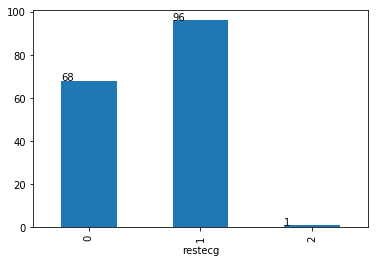

In [21]:
# Check How the restECG effects the Heart deseases
ax=train_df.groupby(['restecg']).sum()['target'].plot(kind='bar')
for i in ax.patches:
  ax.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.show()
              
              

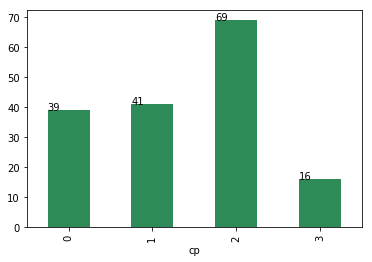

In [31]:
# Check How the CP effects the Heart deseases
ax=train_df.groupby(['cp']).sum()['target'].plot(kind='bar',color='seagreen')
for i in ax.patches:
  ax.annotate(i.get_height(),(i.get_x(),i.get_height()))
plt.show()